In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import h5py as hp

from pic.functions import smooth
from pic.constantes import me

In [43]:

def meanfield(f,key):
    """read the HDF5 file f in order to calculate the mean""
    """
    
    groupNames = [k for k in f.keys()]
    groupNames.sort(key=float)

    datasetNames = [k for k in f[groupNames[0]].keys()]
    
    if key not in datasetNames:
        raise NameError('Wrong HDF5 key for dataset !'+key+" is not in "+str(datasetNames) )
    
    for gn in groupNames[:-1]:
        if gn == groupNames[0]:
            tab = f[gn][key][()]
        else:
            tab += f[gn][key][()] 
        
    return tab/(len(groupNames))


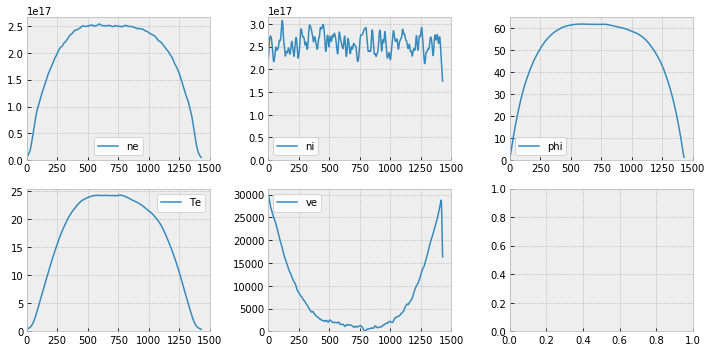

In [44]:
fileName = "data/run12.h5"

f = hp.File(fileName,"r")

keys = ['ne','ni',"phi",
       'Te','ve']

Nlines = 2
Ncol = int(len(keys)/2)+1
with plt.style.context("bmh"):
    fig, axarr = plt.subplots(Nlines,Ncol, figsize=(10,5))

for key,ax in zip(keys, axarr.flatten()):
    vect = meanfield(f,key)
    ax.plot(abs(smooth(vect)), label = key)
    ax.legend()
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)
plt.tight_layout()

f.close()

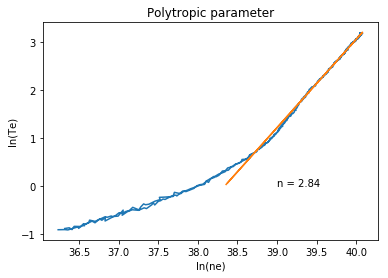

In [99]:
f = hp.File(fileName,"r")

Te = meanfield(f,"Te")[:-2]
ne = meanfield(f,"ne")[:-2]
logTe = np.log(Te)
logNe = np.log(ne)
f.close()

plt.plot(logNe,logTe)
plt.xlabel("ln(ne)")
plt.ylabel("ln(Te)")
plt.title("Polytropic parameter")

NCutFit = 50
logNeCut = logNe[NCutFit:-1-NCutFit]
logTeCut = logTe[NCutFit:-1-NCutFit]

p = np.polyfit(logNeCut,logTeCut,1)
plt.plot(logNeCut, p[0]*logNeCut+p[1])
plt.text(39,0,f"n = {p[0]+1:2.2f}")
n = p[0] + 1

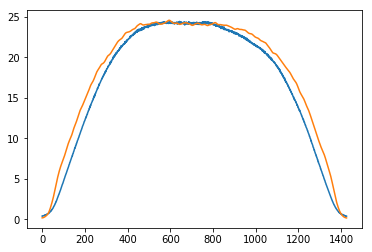

In [98]:
plt.plot(Te)
Nmid = int(len(Te)/2)
nesmooth = smooth(ne)
TePoly = Te[Nmid]*nesmooth[Nmid]**(1 - n)/(nesmooth**(1-n))

plt.plot(TePoly)

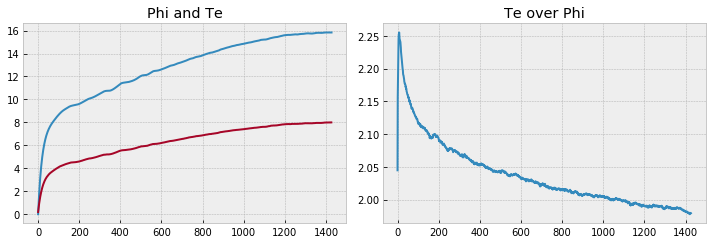

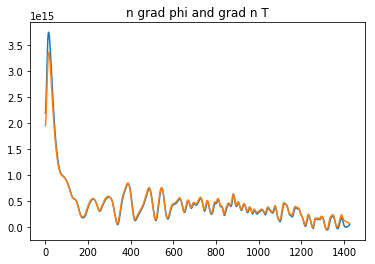

In [8]:
Te = meanfield("Te",data)
phi = meanfield("phi",data)
ne = meanfield("ne",data)

with plt.style.context("bmh"):

    plt.figure(figsize=(10,3.5))
    plt.subplot(121)
    plt.plot(phi)
    plt.plot(Te)
    plt.title("Phi and Te")
    plt.subplot(122)
    plt.plot((phi[1:]/Te))
    plt.title("Te over Phi")

plt.tight_layout()

plt.show()

ve = meanfield("ve",data)

nT = ne[:-1]*Te
plt.plot(smooth(ne*np.gradient(phi)))
plt.plot(smooth(np.gradient(nT)))
#plt.plot(smooth(np.gradient(me*ne[:-1]*ve**2)))
plt.title("n grad phi and grad n T")
print("")

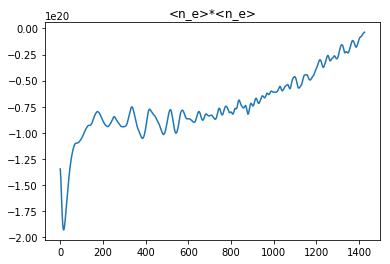

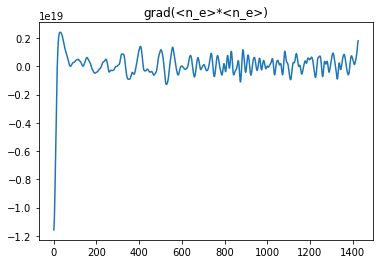

In [38]:
ve = meanfield("ve",data)

plt.title("<n_e>*<n_e>")
plt.plot(smooth(ve*ne[:-1]))
plt.show()

plt.title("grad(<n_e>*<n_e>)")
plt.plot(smooth(np.gradient(ve*ne[:-1])))
